In [1]:
import pandas as pd

df = pd.read_csv('/content/5_Data.csv', encoding="cp1252")
df

<ipython-input-1-108bd4bcfaee>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/5_Data.csv', encoding="cp1252")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [3]:
df['state'] = df['state'].replace({'Uttaranchal' : 'Uttarakhand'})

In [4]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'andaman-and-nicobar-islands',
       'Lakshadweep', 'Tripura'], dtype=object)

In [6]:
df['type'].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [12]:
import numpy as np
types = {
    "Residential": "R",
    "Rural and other Areas" : "RO",
    "Residential and others" : "RO",
    "Industrial" : "I",
    "Industrial Area": "I",
    "Industrial Areas" : "I",
    "Sensitive Area" : "S",
    "Sensitive Areas" : "S",
    "Sensitive" : "S",
    np.nan: "RRO"
}

In [13]:
df['type'] = df['type'].replace(types)
df['type'].unique()

array(['Residential, Rural and other Areas', 'I', 'RRO', 'S', 'RO', 'R',
       'RIRUO'], dtype=object)

In [14]:
df.isna().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149481
type,0
so2,34646
no2,16233
rspm,40222
spm,237387


In [16]:
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

df[cols] = imputer.fit_transform(df[cols])

df.isna().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149481
type,0
so2,0
no2,0
rspm,0
spm,0


In [17]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,NaN,40.791467,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.100000,7.000000,108.832784,220.78348,NaN,40.791467,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,NaN,40.791467,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,NaN,40.791467,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.700000,7.500000,108.832784,220.78348,NaN,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


In [22]:
each_state_so2 = df.groupby('state')['so2'].mean()

In [23]:
each_state_so2

,so2
state,
Andhra Pradesh,7.377196
Arunachal Pradesh,5.134184
Assam,6.751470
Bihar,18.825122
Chandigarh,6.601060
Chhattisgarh,12.717299
Dadra & Nagar Haveli,8.954491
Daman & Diu,8.196329
Delhi,8.918570


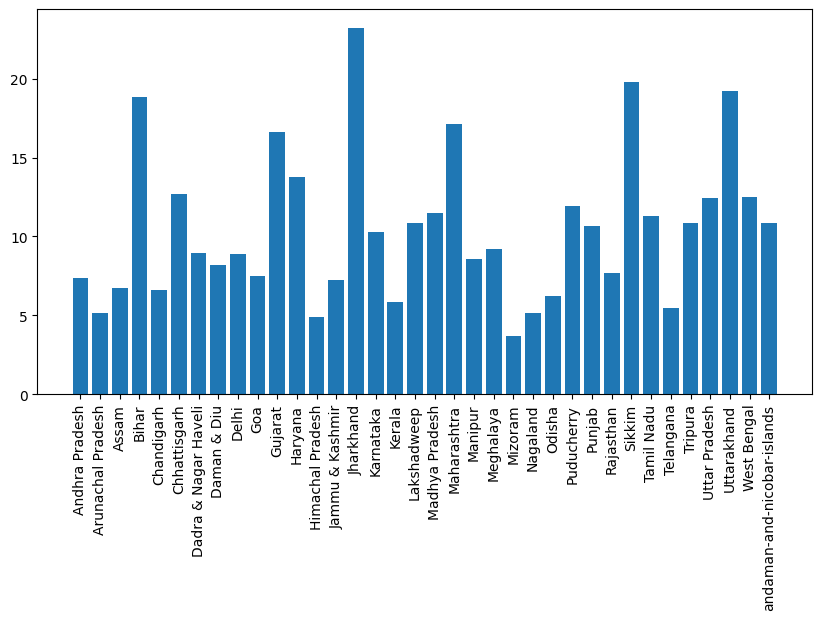

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(each_state_so2.index, each_state_so2)
plt.xticks(rotation=90)
plt.show()

In [30]:
data = each_state_so2.sort_values(ascending=False)

In [37]:
top_10 = data[:10]
bottom_10 = data[-10:]

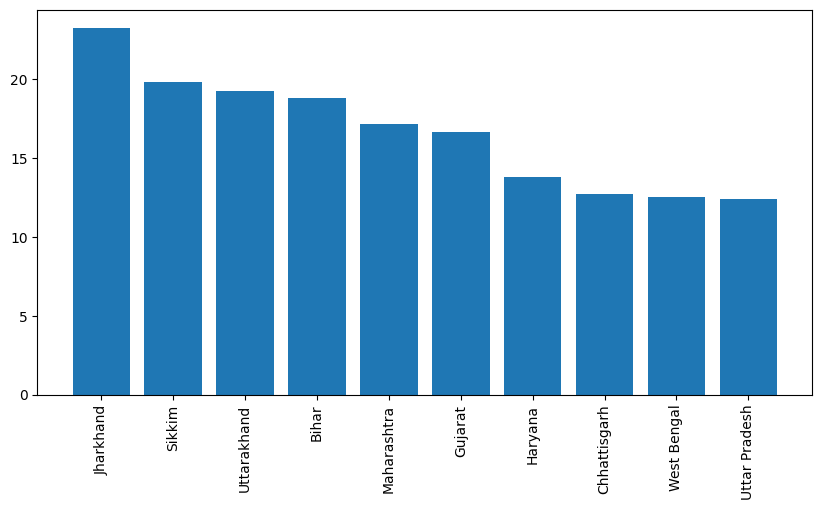

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top_10.index, top_10)
plt.xticks(rotation=90)
plt.show()

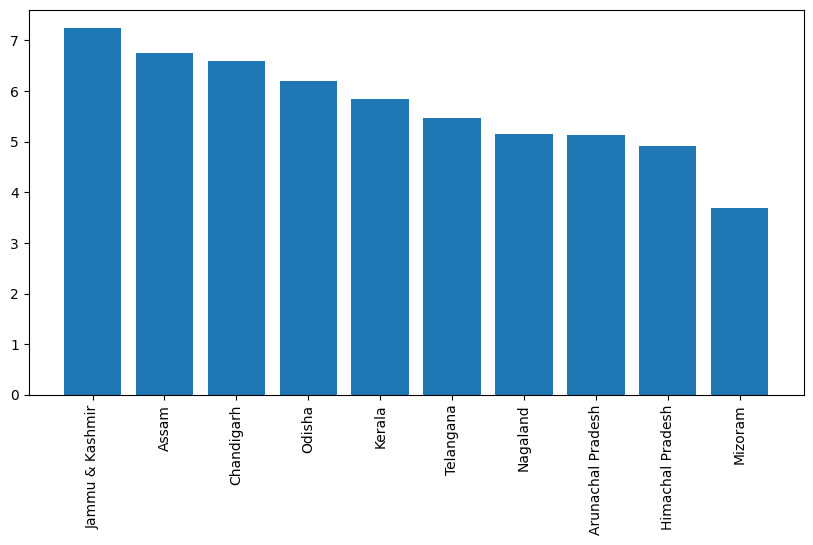

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(bottom_10.index, bottom_10)
plt.xticks(rotation=90)
plt.show()

In [39]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,NaN,40.791467,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.100000,7.000000,108.832784,220.78348,NaN,40.791467,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,NaN,40.791467,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,NaN,40.791467,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.700000,7.500000,108.832784,220.78348,NaN,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


In [42]:
pivot = df.pivot_table(index="type", values=["so2", "no2", "rspm", "spm", "pm2_5"], aggfunc="mean")

In [43]:
pivot

,no2,pm2_5,rspm,so2,spm
type,,,,,
I,29.325791,40.850110,120.624388,13.225617,230.830214
R,21.331916,40.791467,108.832784,13.835891,272.668993
RIRUO,31.779908,39.474997,103.617331,10.912577,220.783480
RO,25.413627,40.791467,102.981682,10.353020,214.538753
RRO,27.512628,40.791467,104.776528,16.005595,187.528211
"Residential, Rural and other Areas",23.471539,40.752550,102.812524,9.272324,215.931679
S,20.214671,40.791467,100.053598,6.617897,227.048483


<Axes: xlabel='type'>

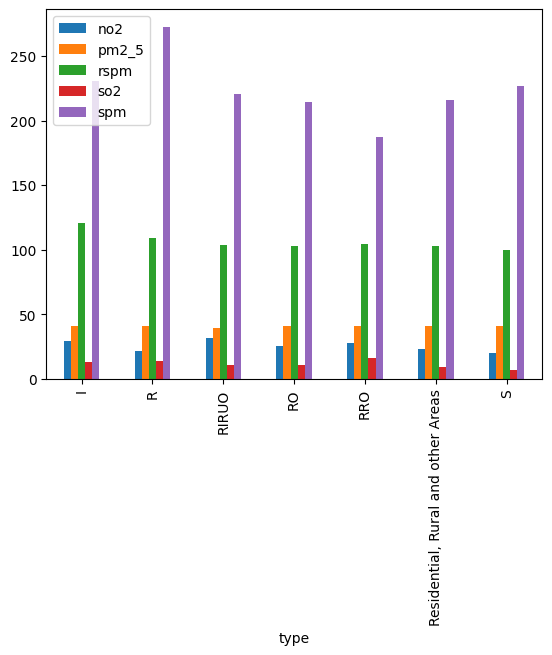

In [46]:
pivot.plot(kind="bar")